# Aplicando kMeans

## Geração de um dataset fictício

### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Configurações iniciais

In [48]:
# Configurações iniciais
np.random.seed(42)

n_samples = 200  # Número de amostras por cluster

# Centros de clusters mais distintos
centers = [
    [20, 20], # Produtos de baixo custo que vendem pouco
    [18, 35], # Produtos de baixo custo que vendem muito
    [80, 20], # Produtos de alto custo que vendem pouco
    [80, 25]  # Produtos de alto custo que vendem muito
]

# Gere dados em torno desses centros
unit_price = []
items_sold = []
product_category = []
avg_website_visits_last_week = []
shipment_type = []

### Popula o `DataFrame`

In [49]:
for center in centers:
    # possuem correlação
    unit_price.extend(np.random.normal(center[0], 3, n_samples))
    items_sold.extend(np.round(np.random.normal(center[1], 3, n_samples)).tolist())

    # Aleatórios
    product_category.extend(np.random.choice(['Eletrônicos', 'Vestuário', 'Casa'], n_samples))
    avg_website_visits_last_week.extend(np.random.randint(500, 2000, n_samples))
    shipment_type.extend(np.random.choice(['Aérea', 'Terrestre', 'Marítma'], n_samples))

# Criar o DataFrame
df = pd.DataFrame({
    'unit_price': unit_price,
    'product_category': product_category,
    'avg_website_visits_last_week': avg_website_visits_last_week,
    'shipment_type': shipment_type,
    'items_sold': items_sold,
})
df.head(2)

,unit_price,product_category,avg_website_visits_last_week,shipment_type,items_sold
0,21.490142,Casa,1669,Terrestre,21.0
1,19.585207,Casa,610,Aérea,22.0


## Treinamento do modelo

### Preparação dos dados

**Separe as variáveis categóricas das nominais e ordinais**

In [50]:
# Separando as variáveis numéricas e categóricas manualmente
num_features = ['unit_price', 'avg_website_visits_last_week', 'items_sold']
cat_features = ['product_category', 'shipment_type']

**Transforme a escala das variáveis intervalares**

In [51]:
# Faz a padronização automática
scaler = StandardScaler()

# Transforma a escala das variáveis numéricas
transformed_num = scaler.fit_transform(df[num_features])
df_transformed_num = pd.DataFrame(transformed_num, columns=num_features) # Converte novamente para `DataFrame`
df_transformed_num.head(2)

,unit_price,avg_website_visits_last_week,items_sold
0,-0.919084,0.945744,-0.598988
1,-0.981438,-1.512082,-0.452938


**Converta as variáveis categóricas**

In [52]:
# Converte para categorias
df.product_category = df.product_category.map({'Eletrônicos': 0, 'Vestuário': 1, 'Casa': 2})
df.shipment_type = df.shipment_type.map({'Aérea': 0, 'Terrestre': 1, 'Marítma': 2})

**Crie um dataset único para o treinamento**

In [53]:
# Concatena os dois datasets para formar um único dataset preparado
df_prepared = pd.concat([df_transformed_num, df[cat_features] ], axis=1) # O axis = 1 indica que você quer concatenar (i.e., juntar) colunas e não linhas
df_prepared.head(2)

,unit_price,avg_website_visits_last_week,items_sold,product_category,shipment_type
0,-0.919084,0.945744,-0.598988,2,1
1,-0.981438,-1.512082,-0.452938,2,0


### Encontrando o número ideal de clusters

**Selecione os atributos que farão parte do K-Means**

In [54]:
df_selected =  df_prepared.filter(['unit_price', 'items_sold'])
df_selected.head(2)

,unit_price,items_sold
0,-0.919084,-0.598988
1,-0.981438,-0.452938


**Calcule a inércia para diferentes valores de $k$**

In [55]:
# Calcule a inércia para diferentes valores de k
inertia = []
for i in range(1, 11):  # Número de clusters de 1 a 10
    kmeans = KMeans(n_clusters=i, n_init='auto', random_state=42)
    kmeans.fit(df_selected)
    inertia.append(kmeans.inertia_)

# Veja os valores das inércias
inertia

[1600.0000000000002,
 731.2614227244921,
 205.16652184215988,
 122.39760132872233,
 101.80364035403474,
 78.34879258256916,
 57.0806596040691,
 50.39003647924156,
 44.59861405496948,
 35.34784837317511]

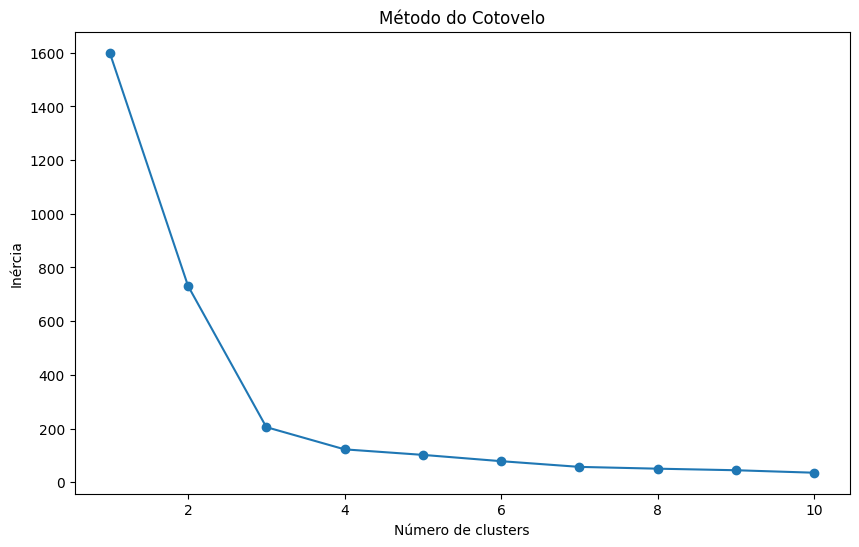

In [56]:
# Plote o gráfico
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

### K-Means

In [57]:
# Aplicar K-means
kmeans = KMeans(n_clusters=4, n_init='auto', random_state=42)
df['cluster'] = kmeans.fit_predict(df_selected)
#df.head(50)

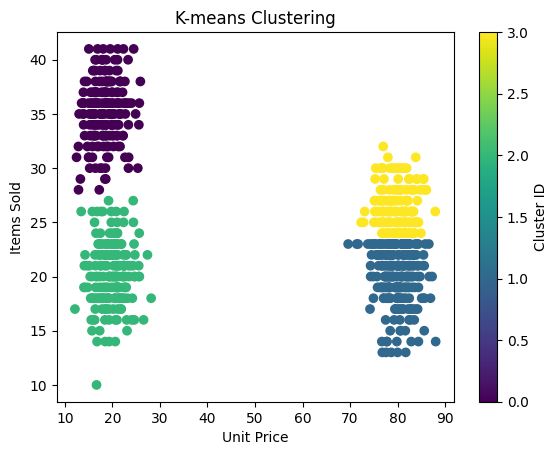

In [58]:
# Visualização
plt.scatter(df['unit_price'], df['items_sold'], c=df['cluster'])
plt.xlabel('Unit Price')
plt.ylabel('Items Sold')
plt.colorbar(label='Cluster ID')
plt.title('K-means Clustering')
plt.show()

## Pratique

**[EX01]** Como o número de amostras (`n_samples`) afeta os clusters? Tente usar diferentes números e observe as mudanças.

**[EX02]** O que acontece se você não padronizar as variáveis intervalares? 

* Como a diferença de escala afeta o resultado do clustering?

* Faz diferença se você utilizar o log ou a padronização nas variáveis intervalares?

**[EX03]** Modifique os valores dos centros de clusters definidos na variável `centers`. 

* Experimente centros como o `[30,30]`, `[25,50]`, `[90,30]`, e `[85,45]`. 

* Como a mudança nos valores dos centroides afetou a distribuição dos pontos de dados? 

* Os clusters estão mais dispersos ou mais densos?

* Como você interpretaria os novos clusters em um contexto de negócios?

**[EX04]** Atualmente, o código usa apenas `unit_price` e `items_sold` para o clustering. Tente incorporar as variáveis categóricas (`product_category`, `shipment_type` e `avg_website_visits_last_week `) e descreva como isso afeta os clusters.

**[EX05]** Suponha que você também queira levar em consideração a sazonalidade das vendas de produtos. Para fazer isso, você decide incluir uma nova coluna chamada `sales_season` que indica em qual estação do ano o produto vende mais: "Verão", "Outono", "Inverno" ou "Primavera". 

* Adicione uma nova coluna chamada `sales_season` aos dados, atribuindo aleatoriamente uma das quatro estações do ano para cada amostra de produto.

* Converta a nova coluna categórica para uma forma numérica adequada para modelagem.

* Incorpore essa nova característica no modelo K-Means e realize o agrupamento.

**[EX06]** O gráfico atual é um gráfico de dispersão 2D. Crie um gráfico 3D incorporando uma terceira variável.